# Predictive Modelling – Loan Default Prediction

This project predicts whether a loan will default based on customer features like income, age, and loan amount. We use a synthetic dataset to build and evaluate a logistic regression model.

Our workflow includes:
- Loading and exploring the data
- Preparing features for modeling
- Training a logistic regression classifier
- Evaluating model performance with common metrics


In [8]:
# Loan Default Prediction – Thomas Beazer

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

## Load Dataset

We load a synthetic dataset of loan applicants containing the following columns:
- `income`: annual income
- `age`: age of the applicant
- `loan_amount`: amount requested
- `defaulted`: whether the loan defaulted (1 = default, 0 = repaid)


In [10]:
# Load data
df = pd.read_csv('/Users/asus/Documents/Github Portfolio/Predictive_Modelling_Loadn_Default/data/loan_data.csv/loan_data.csv')
print(df.head())

   income  age  loan_amount  defaulted
0   57450   21         7872          0
1   47926   45        10393          0
2   59715   36        14064          0
3   72845   59         9181          1
4   46487   52         7888          0


## Exploratory Data Analysis (EDA)

We explore the dataset by viewing basic statistics and class distribution of defaults.

### Visualizing Default Distribution

We plot the number of defaults vs non-defaults to understand class imbalance.


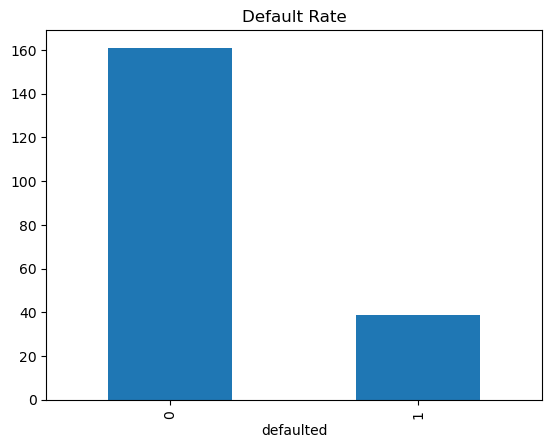

In [14]:
# EDA
df.describe()
df['defaulted'].value_counts().plot(kind='bar')
plt.title('Default Rate')
plt.show()

## Prepare Data for Modeling

We select `income`, `age`, and `loan_amount` as features (X) and `defaulted` as the target (y). We split the data into training and test sets.


In [16]:
# Prepare data
X = df[['income', 'age', 'loan_amount']]
y = df['defaulted']


## Train Logistic Regression Model

We train a logistic regression classifier on the training set to predict loan defaults.


In [18]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Evaluate Model

We generate predictions on the test set and evaluate performance using:
- Confusion matrix
- Classification report (precision, recall, F1-score)
- ROC AUC score


In [26]:

# Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)


### Model Performance Metrics

We print evaluation metrics to assess the model's ability to predict defaults.


In [29]:

# Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('ROC AUC:', roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))


[[31  1]
 [ 8  0]]
              precision    recall  f1-score   support

           0       0.79      0.97      0.87        32
           1       0.00      0.00      0.00         8

    accuracy                           0.78        40
   macro avg       0.40      0.48      0.44        40
weighted avg       0.64      0.78      0.70        40

ROC AUC: 0.5078125


## Conclusion

The logistic regression model provides a baseline for predicting loan defaults using customer features. Further improvements could include:
- Trying more complex models (e.g., random forest)
- Adding additional features (e.g., credit score, employment history)
- Tuning hyperparameters